<a href="https://colab.research.google.com/github/Dristro/IIIT-H/blob/main/module04_02_Intro_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$



In [1]:
# Importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
np.random.seed(42)

We can start be choosing coefficients for a second degree polynomial equation $(a x^2 + bx + c)$ that will distribute the data we will try to model.

Let's define some random x data (inputs) we hope to predict y (outputs) of.

In [2]:
def eval_2nd_degree(coeffs, x):
    """
    Function to return the output of evaluating a second degree polynomial,
    given a specific x value.

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.

    Returns:
        y: The corresponding output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c
    return y

hundred_xs = np.random.uniform(-10, 10, 100)
coeffs = [1, 0, 0]

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree(coeffs, x)
    xs.append(x)
    ys.append(y)

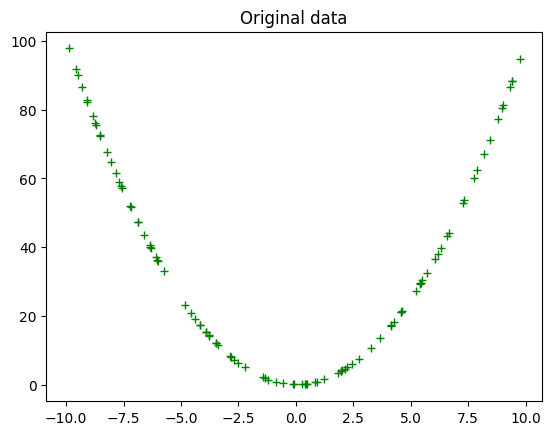

In [3]:
plt.plot(xs, ys, 'g+')
plt.title('Original data')
plt.show()

This is good, but we could improve on this by making things more realistic. You can add noise or **jitter** to the values so they can resemble real-world data.


In [4]:
def eval_2nd_degree_jitter(coeffs, x, j):
    """
    Function to return the noisy output of evaluating a second degree polynomial,
    given a specific x value. Output values can be within [y − j, y + j].

    Args:
        coeffs: List containing the coefficients a, b, and c for the polynomial.
        x: The input x value to the polynomial.
        j: Jitter parameter, to introduce noise to output y.

    Returns:
        y: The corresponding jittered output y value for the second degree polynomial.

    """

    a = coeffs[0] * (x * x)
    b = coeffs[1] * x
    c = coeffs[2]
    y = a + b + c

    interval = [y - j, y + j]
    interval_min = interval[0]
    interval_max = interval[1]
    jit_val = random.random() * interval_max      # Generate a random number in range 0 to interval max

    while interval_min > jit_val:                 # While the random jitter value is less than the interval min,
        jit_val = random.random() * interval_max  # it is not in the right range. Re-roll the generator until it
                                                  # give a number greater than the interval min.

    return jit_val

xs = []
ys = []
for x in hundred_xs:
    y  = eval_2nd_degree_jitter(coeffs, x, 0.1)
    xs.append(x)
    ys.append(y)


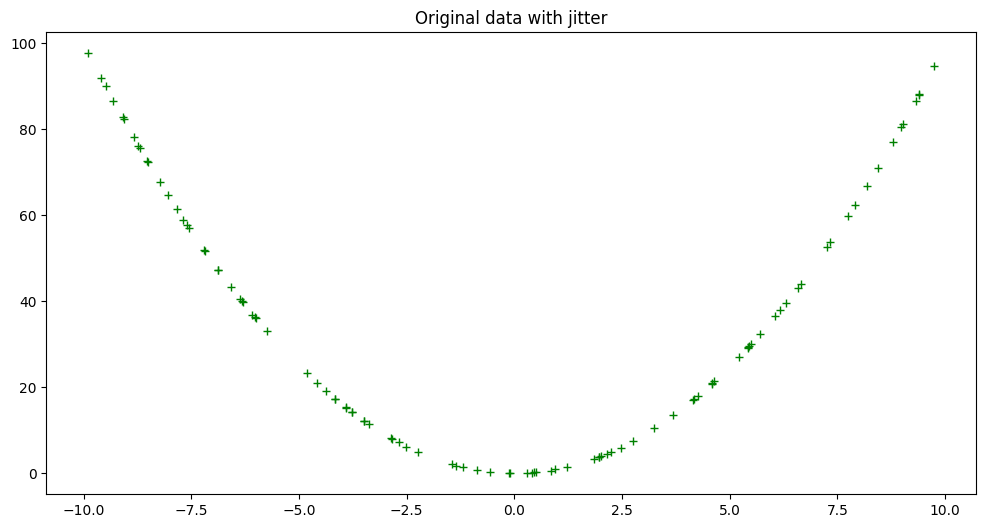

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+')
plt.title('Original data with jitter')
plt.show()

We will now build our predictive model, and optimize it with gradient descent and we will try to get as close to these values as possible.

To get a quantifiable measure of how incorrect it is, we calculate the Mean Squared Error loss for the model. This is the mean value of the sum of the squared differences between the actual and predicted outputs.

$$ E = \frac{1}{n} \sum_{i=0}^n (y_i - \bar{y_i})^2 $$

In [6]:
def loss_mse(ys, y_bar):
    """
    Calculates MSE loss.

    Args:
        ys: training data labels
        y_bar: prediction labels

    Returns: Calculated MSE loss.
    """

    return sum((ys - y_bar) * (ys - y_bar)) / len(ys)

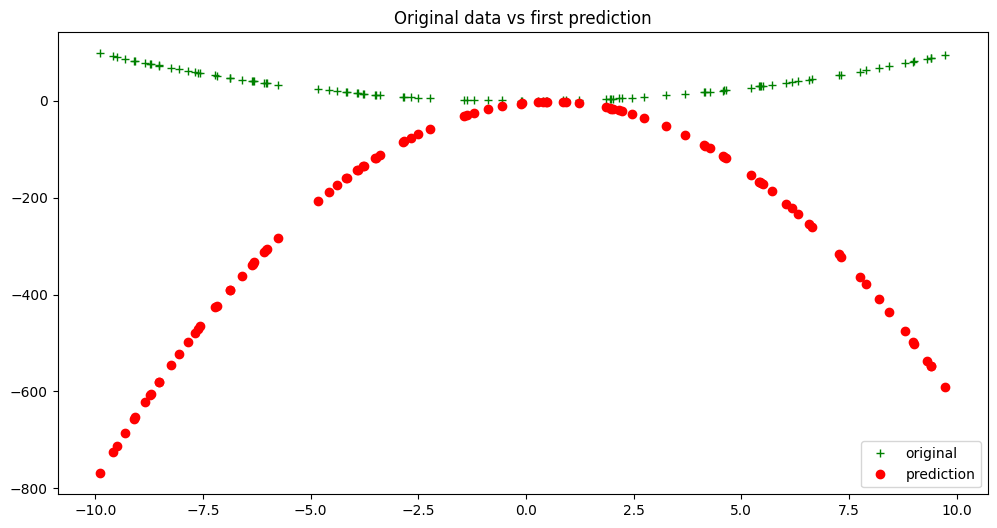

In [7]:
rand_coeffs = (random.randrange(-10, 10), random.randrange(-10, 10), random.randrange(-10, 10))
y_bar = eval_2nd_degree(rand_coeffs, hundred_xs)
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, y_bar, 'ro', label = 'prediction')
plt.title('Original data vs first prediction')
plt.legend(loc="lower right")
plt.show()

In [8]:
initial_model_loss = loss_mse(ys, y_bar)
initial_model_loss

146807.86204726336

We can see that the loss is quite a large number. Let’s now see if we can improve on this fairly high loss metric by optimizing the model with gradient descent.

We wish to improve our model. Therefore we want to alter its coefficients $a$, $b$ and $c$ to decrease the error. Therefore we require knowledge about how each coefficient affects the error. This is achieved by calculating the partial derivative of the loss function with respect to **each** of the individual coefficients.

In [9]:
def calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """

    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(rand_coeffs, hundred_xs)

    for x, y, y_bar in list(zip(hundred_xs, ys, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)

    return (gradient_a, gradient_b, gradient_c)   # return calculated gradients as a a tuple of its 3 parts

In [10]:
calc_grad = calc_gradient_2nd_poly(rand_coeffs, hundred_xs, ys)

lr = 0.0001
a_new = rand_coeffs[0] - lr * calc_grad[0]
b_new = rand_coeffs[1] - lr * calc_grad[1]
c_new = rand_coeffs[2] - lr * calc_grad[2]

new_model_coeffs = (a_new, b_new, c_new)
print(f"New model coeffs: {new_model_coeffs}")

# update with these new coeffs:
new_y_bar = eval_2nd_degree(new_model_coeffs, hundred_xs)
updated_model_loss = loss_mse(ys, new_y_bar)

print(f"Now have smaller model loss: {updated_model_loss} vs {initial_model_loss}")

New model coeffs: (-3.4872074852403587, 7.879149056895183, -4.941405407033594)
Now have smaller model loss: 49608.172144854274 vs 146807.86204726336


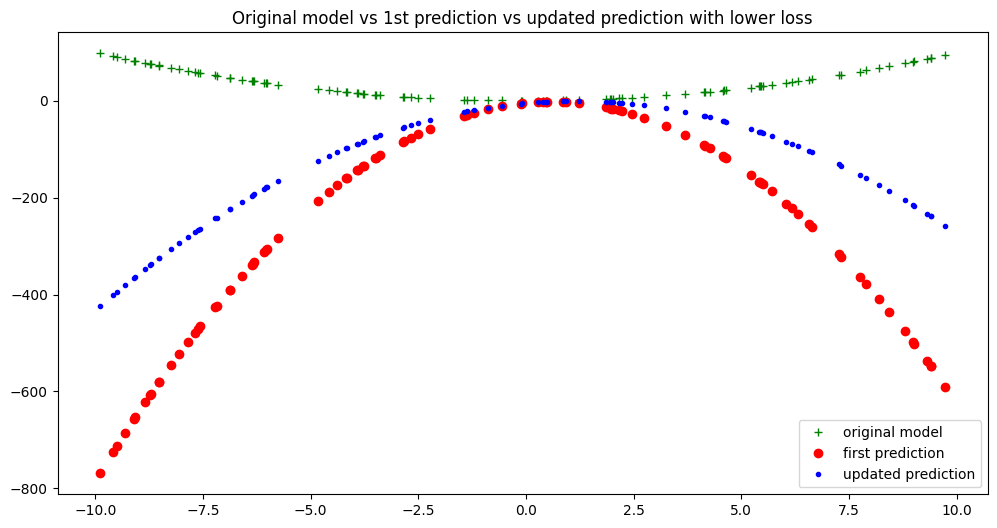

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(xs, ys, 'g+', label = 'original model')
plt.plot(xs, y_bar, 'ro', label = 'first prediction')
plt.plot(xs, new_y_bar, 'b.', label = 'updated prediction')
plt.title('Original model vs 1st prediction vs updated prediction with lower loss')
plt.legend(loc="lower right")
plt.show()

We’re almost ready. The last step will be to perform gradient descent iteratively over a number of epochs (cycles or iterations.) With every epoch we hope to see an improvement in the form of lowered loss, and better model-fitting to the original data.

In [12]:
def calc_gradient_2nd_poly_for_GD(coeffs, inputs_x, outputs_y, lr):
    """
    calculates the gradient for a second degree polynomial.

    Args:
        coeffs: a,b and c, for a 2nd degree polynomial [ y = ax^2 + bx + c ]
        inputs_x: x input datapoints
        outputs_y: actual y output points
        lr: learning rate

    Returns: Calculated gradients for the 2nd degree polynomial, as a tuple of its parts for a,b,c respectively.

    """
    a_s = []
    b_s = []
    c_s = []

    y_bars = eval_2nd_degree(coeffs, inputs_x)

    for x,y,y_bar in list(zip(inputs_x, outputs_y, y_bars)):    # take tuple of (x datapoint, actual y label, predicted y label)
        x_squared = x ** 2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y - y_bar)
        b_s.append(partial_b)
        partial_c = (y - y_bar)
        c_s.append(partial_c)

    num = [i for i in y_bars]
    n = len(num)

    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)


    a_new = coeffs[0] - lr * gradient_a
    b_new = coeffs[1] - lr * gradient_b
    c_new = coeffs[2] - lr * gradient_c

    new_model_coeffs = (a_new, b_new, c_new)

    # update with these new coeffs:
    new_y_bar = eval_2nd_degree(new_model_coeffs, inputs_x)

    updated_model_loss = loss_mse(outputs_y, new_y_bar)
    return updated_model_loss, new_model_coeffs, new_y_bar

In [61]:
def gradient_descent(epochs, lr, verbose=0):
    """
    Perform gradient descent for a second degree polynomial.

    Args:
        epochs: number of iterations to perform of finding new coefficients and updatingt loss.
        lr: specified learning rate
        verbose: silent if (0), verbose if (1)

    Returns: Tuple containing (updated_model_loss, new_model_coeffs, new_y_bar predictions, saved loss updates)

    """
    losses = []
    rand_coeffs_to_test = rand_coeffs
    for i in range(epochs):
        loss = calc_gradient_2nd_poly_for_GD(rand_coeffs_to_test, hundred_xs, ys, lr)
        rand_coeffs_to_test = loss[1]
        losses.append(loss[0])
    if verbose > 0:
        print(losses)
    return loss[0], loss[1], loss[2], losses  # (updated_model_loss, new_model_coeffs, new_y_bar, saved loss updates)

In [62]:
GD = gradient_descent(3000, 0.0003)
GD[0]

3.224832824521896

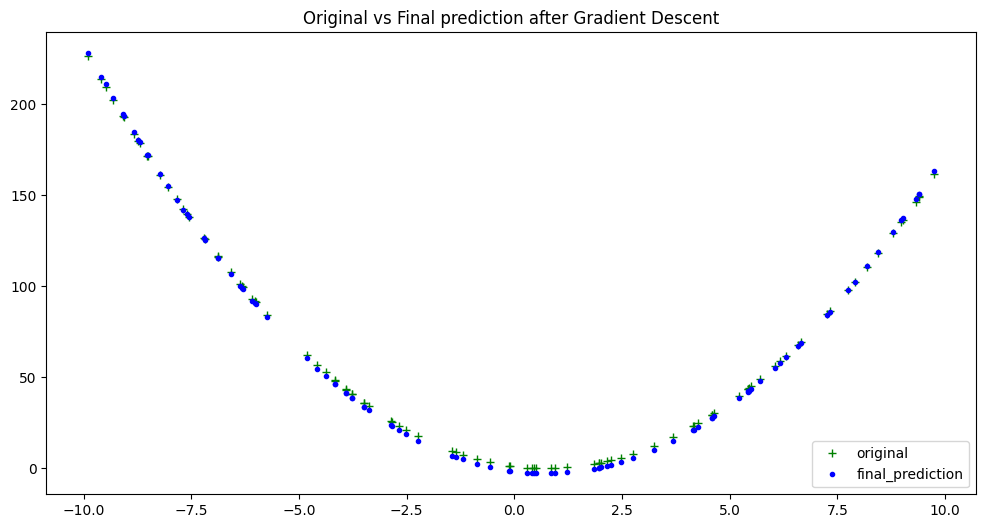

In [63]:
plt.figure(figsize=(12,6))
plt.plot(xs, ys, 'g+', label = 'original')
plt.plot(xs, GD[2], 'b.', label = 'final_prediction')
plt.title('Original vs Final prediction after Gradient Descent')
plt.legend(loc = "lower right")
plt.show()

This trained model is showing vast improvements after it’s full training cycle. We can examine further by inspecting its final predicted coefficients $a$, $b$ and $c$.

In [64]:
print(f"Final Coefficients predicted: {GD[1]}")
print(f"Original Coefficients: {coeffs}")

Final Coefficients predicted: (2.0463689342351574, -2.994614307638683, -1.7923204500770171)
Original Coefficients: [2, -3, 1]


Not too far off! A big improvement over the initial random model. Looking at the plot of the loss reduction over training offers further insights.


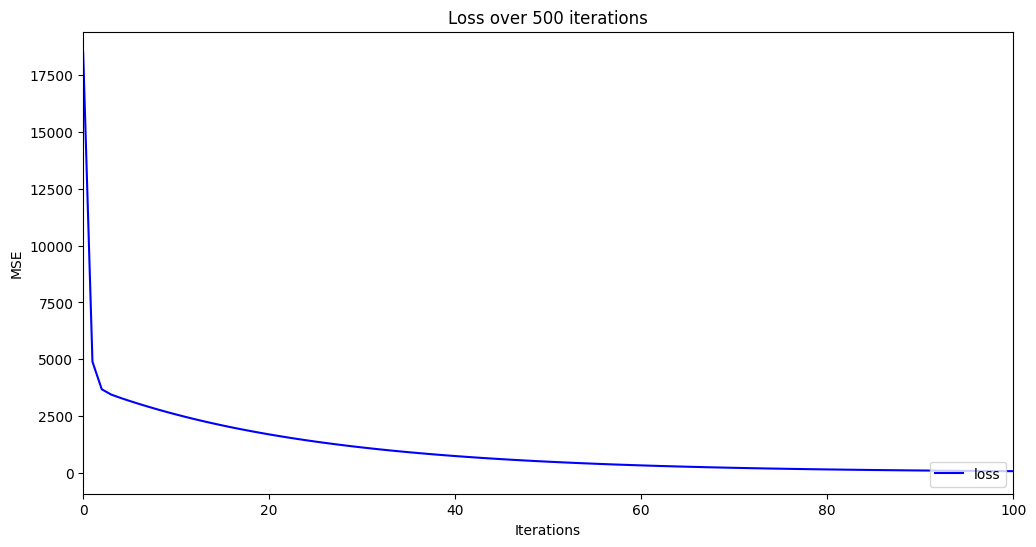

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(GD[3], 'b-', label = 'loss')
# plt.xlim(0,50)
plt.title('Loss over 500 iterations')
plt.legend(loc="lower right")
plt.xlim((0,100))
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.show()

We observe that the model loss reached close to zero, to give us our more accurate coefficients. We can also see there was no major improvement in loss after about 100 epochs. An alternative strategy would be to add some kind of condition to the training step that stops training when a certain minimum loss threshold has been reached. This would prevent excessive training and potential over-fitting for the model.

# Things to try



1.   Change the coefficients array and try a different polynomial instead of our $x^2$.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of $x^2$?
4. Can you modify the algorithm to find a maxima of a function, instead of a minima?



Training:   0%|          | 0/9000 [00:00<?, ?it/s]

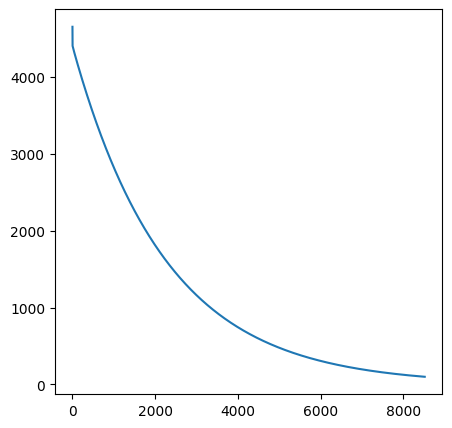

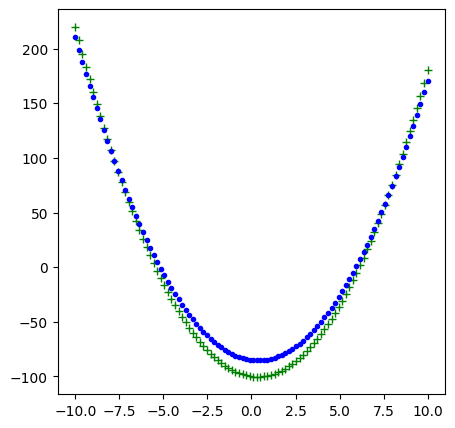

In [163]:
# Custom class for creating and training a perceptron for polynomials
from tqdm.auto import tqdm

class Perceptron():
    def __init__(self):
        self.weights = np.random.randn(3)  # Random weight init

    def loss_fn(self, X, y):
        """l2-loss"""
        y_pred = np.polyval(self.weights, X)
        return np.mean((y - y_pred) ** 2)

    def gradient(self, X, y):
        y_pred = np.polyval(self.weights, X)
        grad = np.array([
            np.sum((y_pred - y) * X**2) / len(X),  # dL/dw2
            np.sum((y_pred - y) * X) / len(X),     # dL/dw1
            np.sum(y_pred - y) / len(X)            # dL/dw0
        ])
        return grad

    def train(self,
              X, y,
              epochs,
              lr,
              eps,):
        """
        Args:
            X, y: training data
            epochs: number of train iters
            lr: learning rate
            eps: epsilon, stoping crit
        """
        train_losses = []
        for i in tqdm(range(epochs), desc="Training", leave=False):
            grad = self.gradient(X, y)
            loss = self.loss_fn(X, y)
            train_losses.append(loss)
            self.weights -= lr*grad
            if loss <= eps:
                break
        return train_losses

    def pred(self, X):
        return np.polyval(self.weights, X)

    @property
    def get_weights(self):
        return self.weights.tolist()


X = np.linspace(-10, 10, 100)
y = 3 * (X**2) - 2*X - 100
perceptron = Perceptron()
losses = perceptron.train(
    X, y,
    epochs = 9000,
    lr = 5e-4,
    eps = 100
)

plt.figure(figsize=(5, 5))
plt.plot(losses)

plt.figure(figsize=(5, 5))
plt.plot(X, y, "g+", label="y-true")
preds = perceptron.pred(X)
plt.plot(X, preds, "b.", label="y-pred");

Training:   0%|          | 0/5000 [00:00<?, ?it/s]

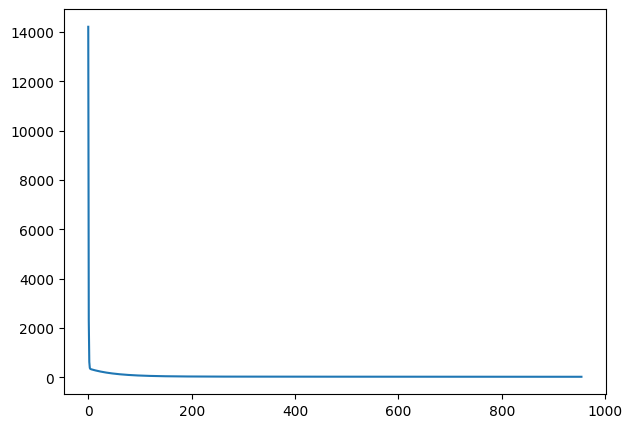

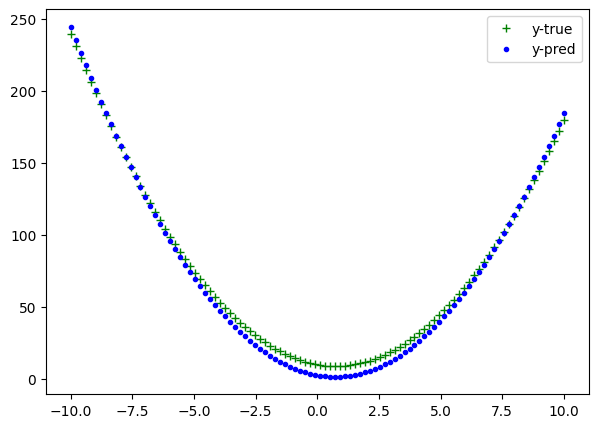

Before: [-0.44004448669698376, 0.13074057728609134, 1.4412732890661155]
After: [2.1225457806618797, -2.9998251704602343, 2.501313985708231]
Expected coeffs: [2, -3, 10]


In [168]:
# Things to try (Q1)
# 1. Change the coefficients array and try a different polynomial instead of our $x^2$.

# Define the data (using new coeffs)
X = np.linspace(-10, 10, 100)
y = 2*X**2 - 3*X + 10  # 2x^2 - 3x + 10

# Create a perceptron instance and train it
safe_iters = 5000
eps = 25
lr = 3e-4

model = Perceptron()
init_weights = model.get_weights
losses = model.train(
    X, y,
    epochs=safe_iters,
    lr=lr,
    eps=eps
)

# Plot loss-curves
plt.figure(figsize=(7, 5))
plt.plot(losses)

# Plot model-preds
plt.figure(figsize=(7, 5))
preds = model.pred(X)
plt.plot(X, y, "g+", label="y-true")
plt.plot(X, preds, "b.", label="y-pred");
plt.legend(loc="upper right")
plt.show();

# Compare model weights before and after training
trained_weights = model.get_weights
print(f"Before: {init_weights}\nAfter: {trained_weights}")
print(f"Expected coeffs: [2, -3, 10]")


In [183]:
# Things to try (Q2)
# 2. Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
from typing import Tuple

# Same data as last task
X = np.linspace(-10, 10, 100)
y = 2*X**2 - 3*X + 10  # 2x^2 - 3x + 10

lrs = [1e-2, 1e-3, 1e-4, 1e-5]  # List of lrs to experiment on
eps = 50
safe_iters = 5000  # Max iters if not converging

results = []  # Final loss for-every lr
result_losses = []  # Loss-history for-every lr
for lr in lrs:
    model = Perceptron()
    losses = model.train(
        X,y,
        epochs=safe_iters,
        lr=lr,
        eps=eps,
    )
    result_losses.append([lr,losses])
    results.append(losses[-1])


Training:   0%|          | 0/5000 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-163-5403250ac033>:11: RuntimeWarning: overflow encountered in square
  return np.mean((y - y_pred) ** 2)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-163-5403250ac033>:39: RuntimeWarning: invalid value encountered in subtract
  self.weights -= lr*grad


Training:   0%|          | 0/5000 [00:00<?, ?it/s]

Training:   0%|          | 0/5000 [00:00<?, ?it/s]

Training:   0%|          | 0/5000 [00:00<?, ?it/s]

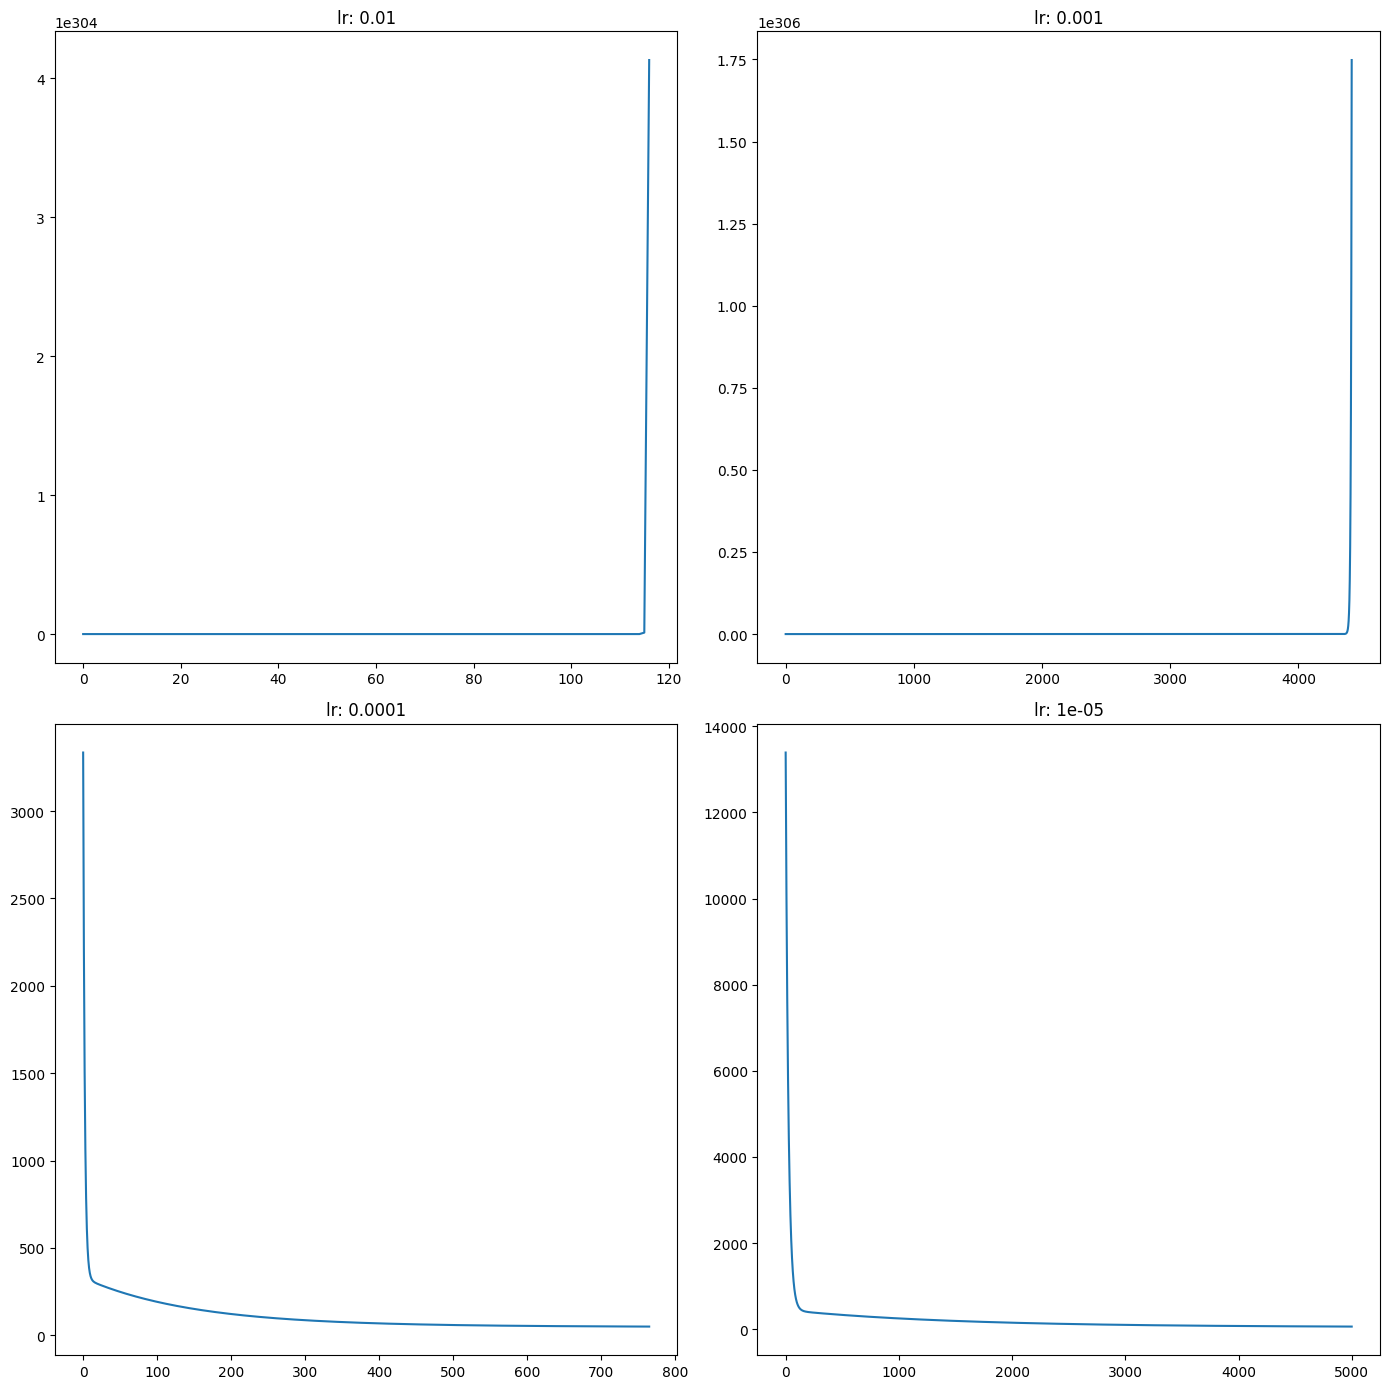

In [193]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(result_losses[i][1])
    ax.set_title(f"lr: {result_losses[i][0]}")

plt.tight_layout()
plt.show();

In [194]:
# Checking the model's final losses
results

[nan, inf, 49.986805684527184, 60.280803556469564]

Looks like a lr near/around `1e-4` is perfect. The model/perceptron convertes quickly and to a lower loss than other lr's. In this process it also hits the target loss (eps = 50), i.e. completing the training process early.

The model diverges when using higher learning rates.\
The model converges when using a lower learning rate, but the rate of convergence is compromised.

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

Training:   0%|          | 0/1000 [00:00<?, ?it/s]

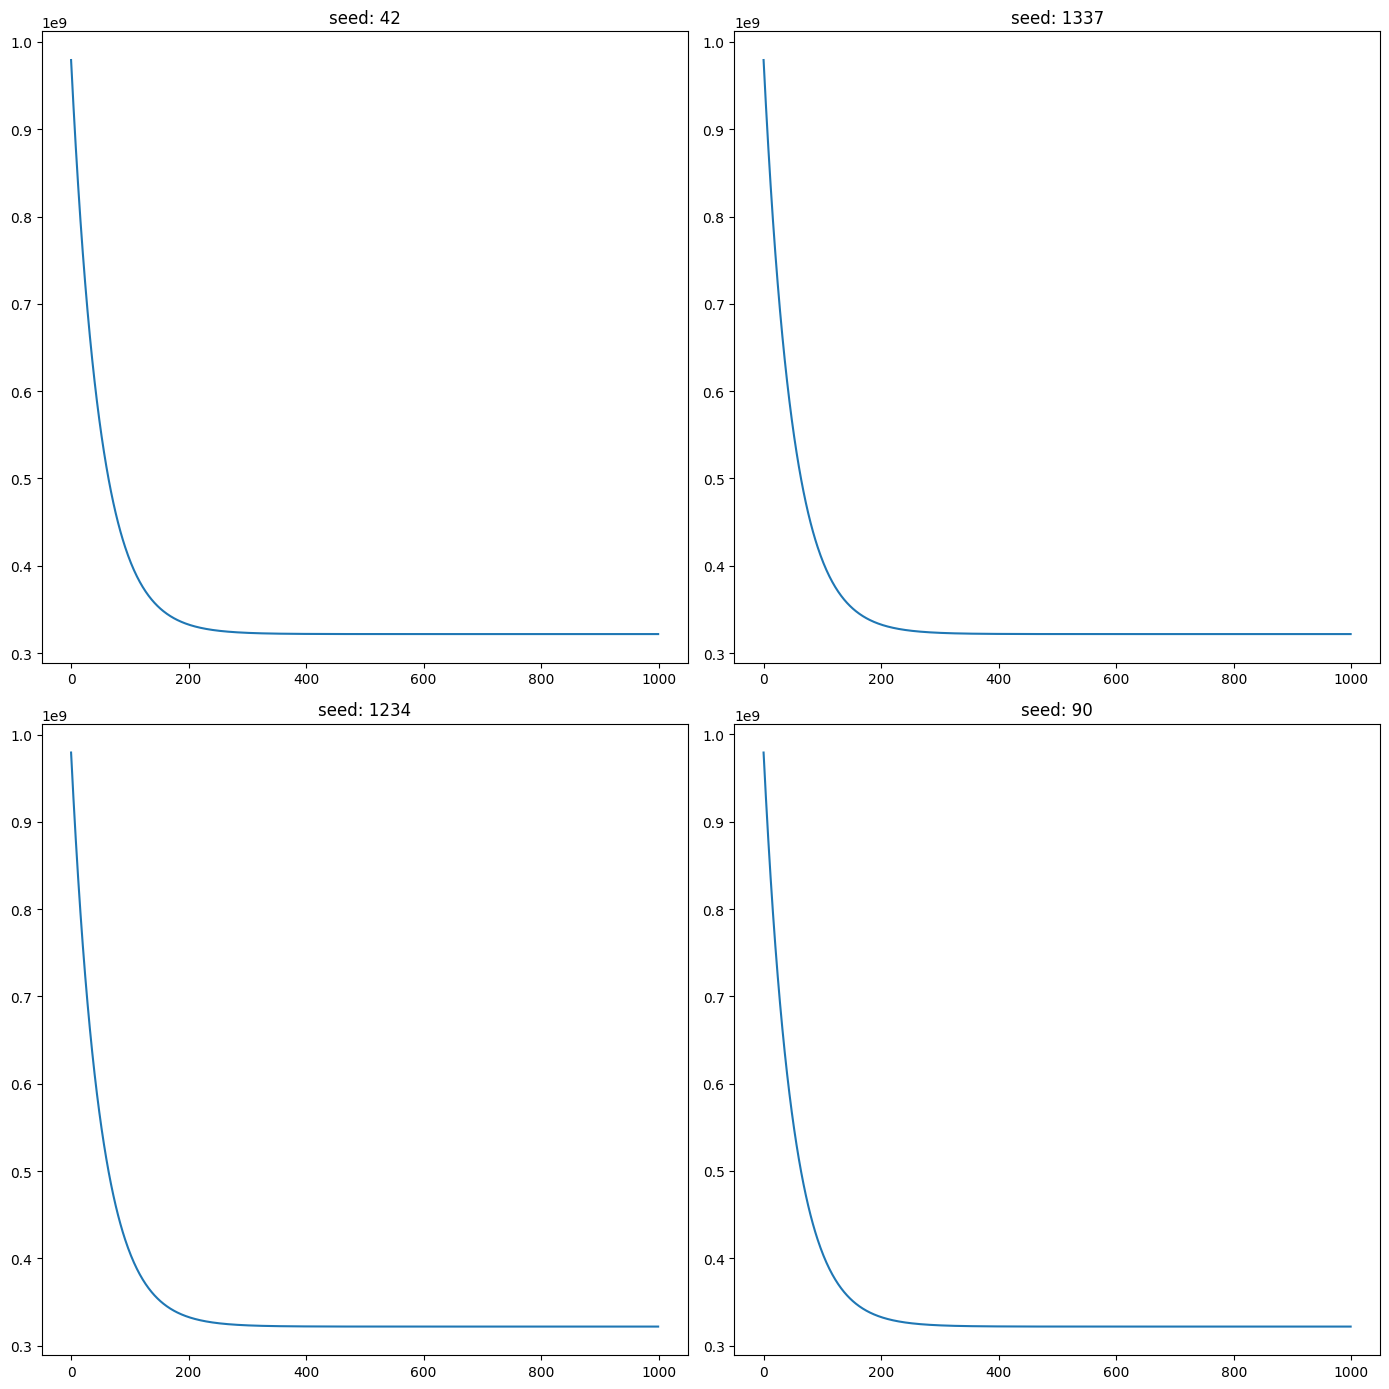

In [204]:
# 3. Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones.
#    Does it converge on different values for different initializations?
#    Why does initialization not matter in our case of $x^2$?

X = np.linspace(-10, 10, 100)
y = X**5 - X**3 - X**2 - X + 10  # 5-deg poly

safe_iters = 1000
lr = 3e-4
eps = 100

seeds = [42, 1337, 1234, 90]  # Differnt init's for model
result_losses_3 = []
results_3 = []
for seed in seeds:
    np.random.seed(seed)  # Init model with different seeds
    model = Perceptron()
    losses = model.train(
        X, y,
        epochs=safe_iters,
        lr = lr,
        eps=eps
    )
    result_losses_3.append([seed, losses])
    results_3.append(losses[-1])


# Plot loss curves
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.plot(result_losses_3[i][1])
    ax.set_title(f"seed: {result_losses_3[i][0]}")

plt.tight_layout()
plt.show();


In [205]:
results_3

[321800226.7957037, 321800233.1649146, 321800221.9935693, 321800235.14070433]

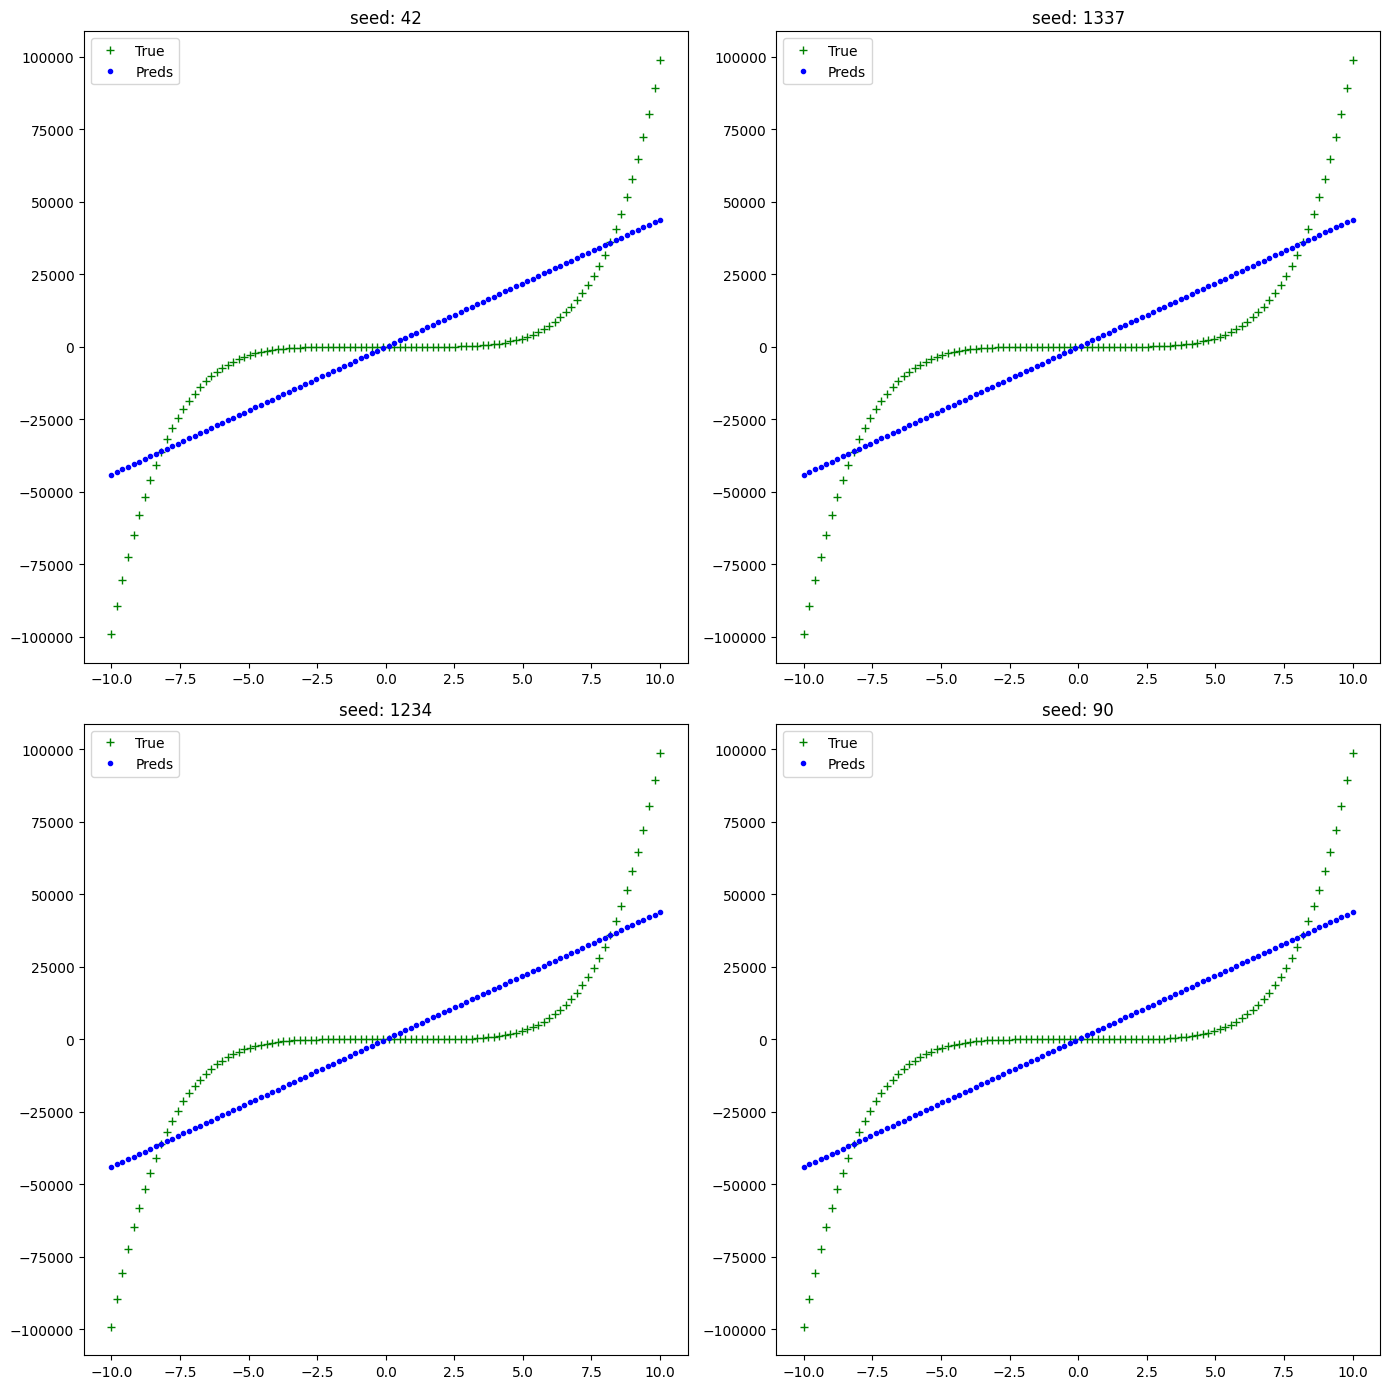

In [211]:
# The loss-curves are very high and converging to a similar point
# Perhaps checking the predictions will be useful
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

for i, ax in enumerate(axes):
    preds = model.pred(X)
    ax.plot(X, y, "g+", label="True")
    ax.plot(X, preds, "b.", label="Preds")
    ax.legend(loc="upper left")
    ax.set_title(f"seed: {result_losses_3[i][0]}")

plt.tight_layout()
plt.show();


This indicates that the currnt implementation of the perceptron is trying to fit a 2nd deg polnomial to a 5th-deg polynomial. Since the number of weights are just 3, the model can't converge to a 'good' curve (set of weights).

In [212]:
# 4. Can you modify the algorithm to find a maxima of a function, instead of a minima?

# Changing the sign during back-propagation.
# Current: self.weights -= lr * grad
# New    : self.weights += lr * grad

# Re-defineing the class seems unnecessary, so i just wanted to mention it here instead.

## **Additional Critical Thinking Questions**

1. You are doing full batch gradient descent using the entire training set. Is it necessary to shuffle the training data? Explain your
answer.

2. You would like to train a dog/cat image classifier using mini-batch gradient
descent. You have already split your dataset into train, dev and test sets. The classes
are balanced. You realize that within the training set, the images are ordered in such a
way that all the dog images come first and all the cat images come after. A friend tells
you: ”you absolutely need to shuffle your training set before the training procedure.”
Is your friend right? Explain.

# Answers

<h2>Q1.</h2>

**No**, when performing full batch-gradient descent, the model's weights/params are updated on the full training data. Here the order doesnt matter.\
**However**, this 'ordering' **does matter** in the case of other algorithms like **SGD** or **mini-batch-SGD**. Here the models learn the 'latest' pattern from each batch/sample, if **there-exists an ordering** in the data, then the model will be biased to the last seen order. For example in binary-classification, if the model sees all 0's then 1's when training. In the end, the model will have learnt the classification for 1's better than 0's, as the model was most optimized for 1's during the end of the train-run. So randomly **shuffeling** the data points/batches is a **good practice** for a **well-generalized model**.

<br>
<br>

<h2>Q2.</h2>

**Yes**, this friend is a saviour. The answer is well explained in **Q1**. Taking this case as an example, if the data is not shuffled then the model **first** updates its params to fit **really well to dogs**. I.e. the model is really good at predicting dogs, now when the model sees cats, then it **starts** to **update** its params to fit **really well to the cat** images.\
This will lead to a **good training loss**, but the model's **val and/or test loss(es)** will be much **greater** than the train-loss. If you **shuffle** the data, then the model's train loss may get higher, however, it starts to **generalize** well. As a result, the **val and test losses will reduce**. So yes, **shuffling data is important** (especially when classifing) when using **SGD** or its **variants** (like mini-batch GD).